In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import preprocess_data
plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)
%load_ext autoreload
%autoreload 2

## Implementing single layer network to test softmax activation and cross-entropy loss

In [ ]:
# STL10
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(n_train_samps=3000, n_test_samps=750, n_valid_samps=1000, n_dev_samps=250)


Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)


In [3]:
from softmax_layer import SoftmaxLayer

In [ ]:
rng = np.random.default_rng(0)
randWts = rng.normal(loc=0, scale=0.01, size=(x_dev.shape[1], 10))
b = 1
softmaxNet = SoftmaxLayer(-1)

# Fake data for consistent debugging
test_imgs = rng.random(size=(15, x_dev.shape[1])) - 0.5
test_labels = rng.integers(low=0, high=6, size=(15,))

In [ ]:
y_test1 = np.array([1, 2, 2, 0, 1, 3])
c_test = 4
y_one_hot = softmaxNet.one_hot(y_test1, c_test)
print(f'one hot vectors:\n{y_one_hot}')

Your one hot vectors:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


Your one hot vectors should look like:

    [[0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 1. 0.]
     [1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 0. 1.]]

In [ ]:
lossNoReg, lossReg = softmaxNet.test_loss(randWts, b, test_imgs, test_labels)
print(f'The loss (without regularization) is {lossNoReg:.2f}')
print(f'The loss (with 0.5 regularization) is {lossReg:.2f}')

net in shape=(15, 10), min=0.584664799299611, max=1.411396670099296
Should be
net in shape=(15, 10), min=0.584664799299611, max=1.411396670099296

net act shape=(15, 10), min=0.0665134672262976, max=0.14392819816212582
Should be
net act shape=(15, 10), min=0.0665134672262976, max=0.1439281981621258

The loss (without regularization) is 2.30 and it should approx be 2.30
The loss (with 0.5 regularization) is 3.07 and it should approx be 3.07


In [ ]:
grad_wts, grad_b = softmaxNet.test_gradient(randWts, b, test_imgs, test_labels, 10)
print()
print(f'1st few Wt gradient values are {grad_wts[:4,0]}')
print(f'1st few Wt bias values are {grad_b[:4]}')

net in: (15, 10), 0.584664799299611, 1.411396670099296
net in 1st few values of 1st input are:
[0.798 1.095 0.969 0.9   0.958]
and should be
[0.798 1.095 0.969 0.9   0.958]
net act 1st few values of 1st input are:
[0.078 0.105 0.092 0.086 0.091]
and should be
[0.078 0.105 0.092 0.086 0.091]
y one hot: (15, 10), sum is 15.0.
You should know what the sum should be :)

1st few Wt gradient values are [ 0.009 -0.047  0.088  0.01 ]
and should be                  [ 0.009 -0.047  0.088  0.01 ] 
1st few Wt bias values are [-0.429  0.034  0.034 -0.098]
and should be              [-0.429  0.034  0.034 -0.098]


In [8]:
softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=250,
                              r_seed=0)

 Iter 0, Loss: 2.3723
 Iter 100, Loss: 2.1285
 Iter 200, Loss: 2.0121
 Iter 300, Loss: 1.9155
 Iter 400, Loss: 1.8740
 Iter 500, Loss: 1.7827


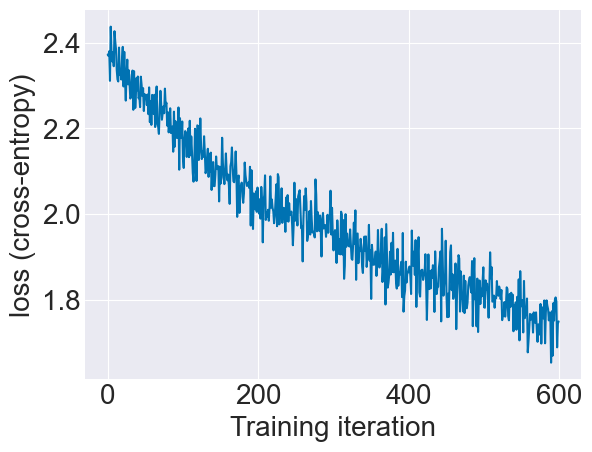

In [9]:
def plot_cross_entropy_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Training iteration')
    plt.ylabel('loss (cross-entropy)')
    plt.show()

plot_cross_entropy_loss(loss_history)

The decrease in loss over the epochs tells us that the model is learning and getting better. The decrease is slowing down, so it is looking like the loss will converge soon. Since it doesn't appear to have converged yet, more epochs could improve it. If we see overfitting during testing, regularization techniques could also help improve.

 Iter 0, Loss: 155.3275
 Iter 100, Loss: 22.6509
 Iter 200, Loss: 4.9172
 Iter 300, Loss: 2.5349
 Iter 400, Loss: 2.2271
 Iter 500, Loss: 2.1873


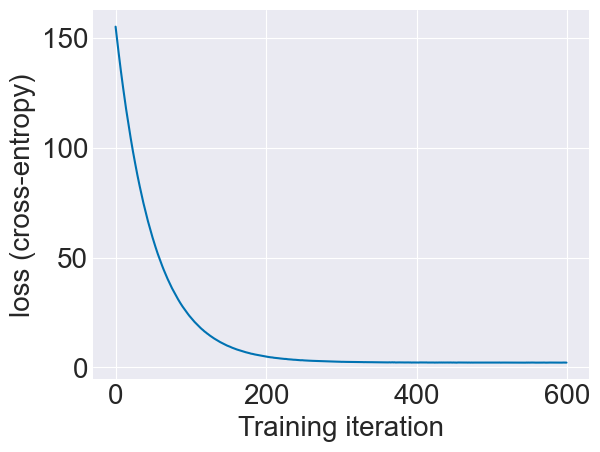

In [10]:
softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=250,
                              r_seed=0,
                              reg=100)

plot_cross_entropy_loss(loss_history)


The lower the batch size, the more noisy the training loss curve. The higher the batch size, the higher amount of loss. This is because the generalization of weight updates aren't random enough to cause a jump out of a local minimum to get to a global minimum.

 Iter 0, Loss: 2.3204
 Iter 100, Loss: 2.1468
 Iter 200, Loss: 1.9297
 Iter 300, Loss: 1.9819
 Iter 400, Loss: 1.9062
 Iter 500, Loss: 1.7239
 Iter 600, Loss: 1.6219
 Iter 700, Loss: 1.6652
 Iter 800, Loss: 1.5471
 Iter 900, Loss: 1.7505
 Iter 1000, Loss: 1.6313
 Iter 1100, Loss: 1.5402
 Iter 1200, Loss: 1.6942
 Iter 1300, Loss: 1.3329
 Iter 1400, Loss: 1.3898
 Iter 1500, Loss: 1.2722
 Iter 1600, Loss: 1.3690
 Iter 1700, Loss: 1.1520
 Iter 1800, Loss: 1.6573
 Iter 1900, Loss: 1.2966
 Iter 2000, Loss: 1.4092
 Iter 2100, Loss: 1.3767
 Iter 2200, Loss: 1.1385
 Iter 2300, Loss: 0.9025
 Iter 2400, Loss: 0.9936
 Iter 2500, Loss: 1.2234
 Iter 2600, Loss: 1.3911
 Iter 2700, Loss: 1.0612
 Iter 2800, Loss: 1.2867
 Iter 2900, Loss: 1.0777
 Iter 3000, Loss: 0.9776
 Iter 3100, Loss: 1.4338
 Iter 3200, Loss: 0.9306
 Iter 3300, Loss: 1.1093
 Iter 3400, Loss: 1.1176
 Iter 3500, Loss: 0.8569
 Iter 3600, Loss: 0.9207
 Iter 3700, Loss: 0.9821
 Iter 3800, Loss: 0.8597
 Iter 3900, Loss: 0.9105
 Iter 4000, 

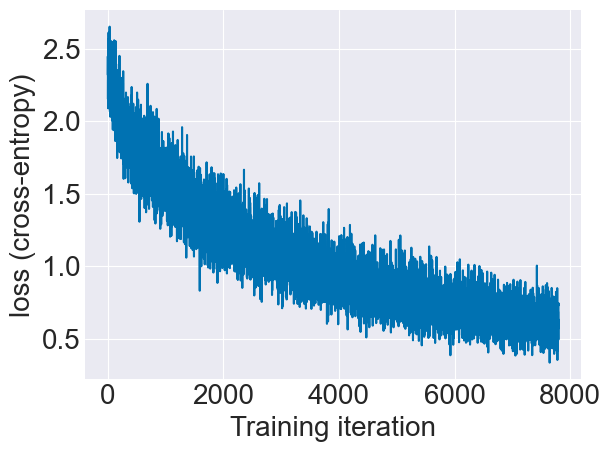

 Iter 0, Loss: 2.3995
 Iter 100, Loss: 2.1947
 Iter 200, Loss: 2.0475
 Iter 300, Loss: 1.7908
 Iter 400, Loss: 1.8484
 Iter 500, Loss: 1.6839
 Iter 600, Loss: 1.7308
 Iter 700, Loss: 1.7745
 Iter 800, Loss: 1.8427
 Iter 900, Loss: 1.5422
 Iter 1000, Loss: 1.5059
 Iter 1100, Loss: 1.5883
 Iter 1200, Loss: 1.3355
 Iter 1300, Loss: 1.6125
 Iter 1400, Loss: 1.4126
 Iter 1500, Loss: 1.3837
 Iter 1600, Loss: 1.4225
 Iter 1700, Loss: 1.2321
 Iter 1800, Loss: 1.3415
 Iter 1900, Loss: 1.2985
 Iter 2000, Loss: 1.3691
 Iter 2100, Loss: 1.2877
 Iter 2200, Loss: 1.1321
 Iter 2300, Loss: 1.1650
 Iter 2400, Loss: 1.2226
 Iter 2500, Loss: 1.3274
 Iter 2600, Loss: 1.0703
 Iter 2700, Loss: 1.1872
 Iter 2800, Loss: 1.1080
 Iter 2900, Loss: 1.1245


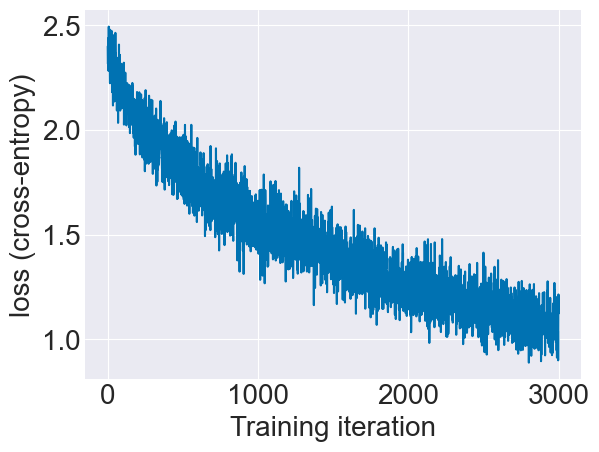

 Iter 0, Loss: 2.3595
 Iter 100, Loss: 2.2110
 Iter 200, Loss: 2.0483
 Iter 300, Loss: 1.9885
 Iter 400, Loss: 1.9821
 Iter 500, Loss: 1.7729
 Iter 600, Loss: 1.7597
 Iter 700, Loss: 1.7040
 Iter 800, Loss: 1.7246
 Iter 900, Loss: 1.6304
 Iter 1000, Loss: 1.6066
 Iter 1100, Loss: 1.4960
 Iter 1200, Loss: 1.4937
 Iter 1300, Loss: 1.4402
 Iter 1400, Loss: 1.2977
 Iter 1500, Loss: 1.4204
 Iter 1600, Loss: 1.3834
 Iter 1700, Loss: 1.4662


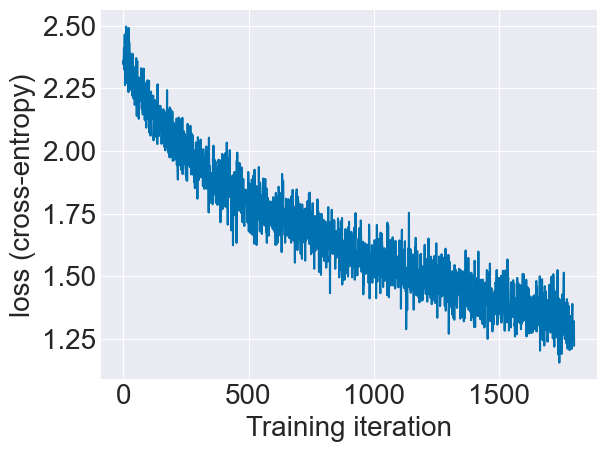

 Iter 0, Loss: 2.3723
 Iter 100, Loss: 2.1285
 Iter 200, Loss: 2.0121
 Iter 300, Loss: 1.9155
 Iter 400, Loss: 1.8740
 Iter 500, Loss: 1.7827


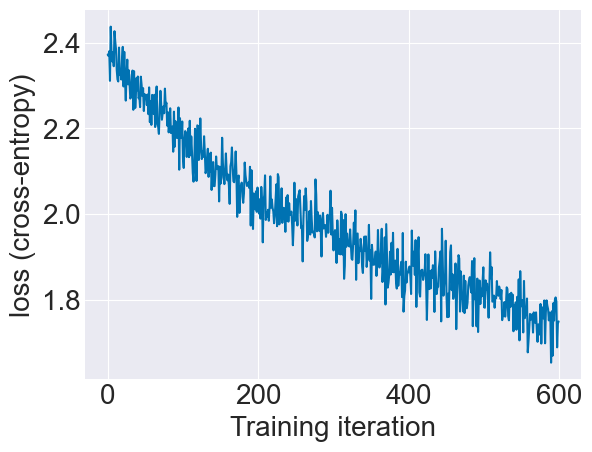

 Iter 0, Loss: 2.3733
 Iter 100, Loss: 2.1750
 Iter 200, Loss: 2.0342
 Iter 300, Loss: 1.9824
 Iter 400, Loss: 1.8692
 Iter 500, Loss: 1.8089


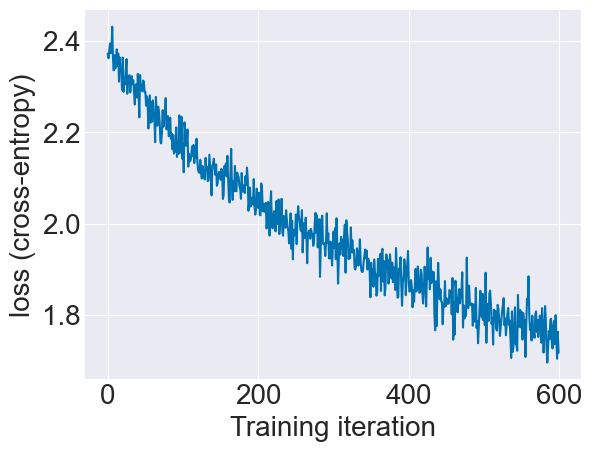

 Iter 0, Loss: 2.3655
 Iter 100, Loss: 2.1748
 Iter 200, Loss: 2.0732
 Iter 300, Loss: 1.9327
 Iter 400, Loss: 1.8760
 Iter 500, Loss: 1.8534


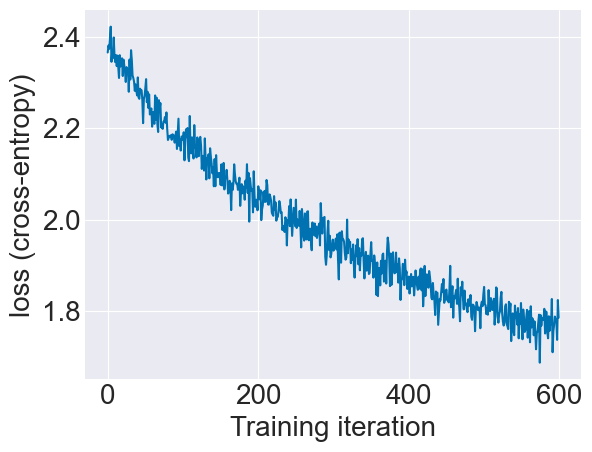

In [11]:
softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=20,
                              r_seed=0)

plot_cross_entropy_loss(loss_history)

softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=50,
                              r_seed=0)

plot_cross_entropy_loss(loss_history)

softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=100,
                              r_seed=0)

plot_cross_entropy_loss(loss_history)

softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=250,
                              r_seed=0)

plot_cross_entropy_loss(loss_history)

softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=400,
                              r_seed=0)

plot_cross_entropy_loss(loss_history)

softmaxNet = SoftmaxLayer(10)

loss_history = softmaxNet.fit(x_dev, y_dev,
                              n_epochs=600,
                              mini_batch_sz=600,
                              r_seed=0)

plot_cross_entropy_loss(loss_history)




In [ ]:
def create_range(low, high, step):
    return np.arange(low, high, step)

#coarse hyperparameters
learning_rate_low = 1e-4
learning_rate_high = 1e-1
learning_rate_step = 2.5e-2

regularization_low = 1e-5
regularization_high = 1
regularization_step = 2.5e-1

batch_size_low = 16
batch_size_high = 512
batch_size_step = 64

learning_rates_coarse = np.array([1e-1, 1e-2, 1e-3, 1e-4])
regularizations_coarse = create_range(regularization_low, regularization_high, regularization_step)
batch_sizes_coarse = create_range(batch_size_low, batch_size_high + 1, batch_size_step)
n_epochs = 75

#best params and acc
best_params = {}
best_val_accuracy = 0

#coarse grid search
r_seed = 0
for lr in learning_rates_coarse:
    for reg in regularizations_coarse:
        for batch_size in batch_sizes_coarse:
            
            softmaxNet = SoftmaxLayer(10)
            loss_history = softmaxNet.fit(x_train, y_train, r_seed=r_seed,
                                          n_epochs=n_epochs,
                                          lr=lr,
                                          mini_batch_sz=batch_size,
                                        verbose=0)
            train_preds = softmaxNet.predict(x_train)
            train_accuracy = softmaxNet.accuracy(y_train, train_preds)
            val_preds = softmaxNet.predict(x_val)
            val_accuracy = softmaxNet.accuracy(y_val, val_preds)
            
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_params = {
                    'learning_rate': lr,
                    'regularization': reg,
                    'batch_size': batch_size,
                    'random_seed': rng
                }
                print(f"Coarse Search - seed: {r_seed}, lr: {lr}, reg: {reg}, batch_size: {batch_size}, val_acc: {val_accuracy}, train_acc: {train_accuracy}")

            r_seed = r_seed + 1


Coarse Search - seed: 0, lr: 0.1, reg: 1e-05, batch_size: 16, val_acc: 0.287, train_acc: 0.945
Coarse Search - seed: 2, lr: 0.1, reg: 1e-05, batch_size: 144, val_acc: 0.305, train_acc: 0.918
Coarse Search - seed: 3, lr: 0.1, reg: 1e-05, batch_size: 208, val_acc: 0.306, train_acc: 0.7833333333333333
Coarse Search - seed: 21, lr: 0.1, reg: 0.50001, batch_size: 336, val_acc: 0.316, train_acc: 0.6606666666666666
Coarse Search - seed: 34, lr: 0.01, reg: 1e-05, batch_size: 144, val_acc: 0.332, train_acc: 0.732
Coarse Search - seed: 35, lr: 0.01, reg: 1e-05, batch_size: 208, val_acc: 0.333, train_acc: 0.6843333333333333
Coarse Search - seed: 36, lr: 0.01, reg: 1e-05, batch_size: 272, val_acc: 0.342, train_acc: 0.661
Coarse Search - seed: 37, lr: 0.01, reg: 1e-05, batch_size: 336, val_acc: 0.355, train_acc: 0.6316666666666667
Coarse Search - seed: 55, lr: 0.01, reg: 0.50001, batch_size: 464, val_acc: 0.358, train_acc: 0.5993333333333334
Coarse Search - seed: 65, lr: 0.001, reg: 1e-05, batch_si

In [ ]:
bestNet = SoftmaxLayer(10)
loss_history = bestNet.fit(x_train, y_train, r_seed=65,
                              n_epochs=n_epochs,
                              lr=0.001,
                              mini_batch_sz=80,
                              verbose=0)
val_preds = bestNet.predict(x_val)
val_accuracy = bestNet.accuracy(y_val, val_preds)
print(val_accuracy)


0.363


In [ ]:
test_preds = bestNet.predict(x_test)
test_accuracy = bestNet.accuracy(y_test, test_preds)
print(test_accuracy)

0.37066666666666664


### Visualizing learned weights

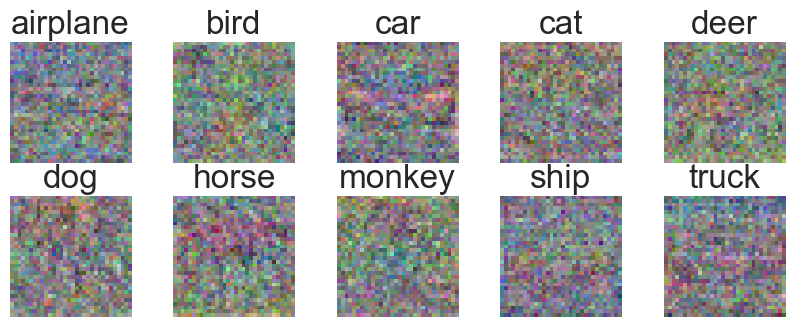

In [ ]:
classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

wts = bestNet.wts
wts = wts.reshape(32, 32, 3, 10)

plt.figure(figsize=(10, 4))

for i in range(10):
  plt.subplot(2, 5, i+1)

  currImg = 255.0 * (wts[:, :, :, i].squeeze() - np.min(wts)) / (np.max(wts) - np.min(wts))

  plt.imshow(currImg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
plt.subplots_adjust(wspace=0.35, hspace=0)
plt.show()